In [39]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
re_data = pd.read_csv('data/Ames_Real_Estate_Data.csv')
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [40]:
re_data

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22208,1018100010,1018100010,0,0,2400 SE 16TH ST,HOC,NaN,O-GSE,NaN,COMMERCIAL,...,2400,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22209,1018100025,1018100025,0,0,2500 SE 16TH ST,HOC,NaN,NaN,NaN,COMMERCIAL,...,2500,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22210,1018100035,1018100035,0,0,2600 SE 16TH ST,HOC,NaN,NaN,NaN,COMMERCIAL,...,2600,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22211,1018100040,1018100040,0,0,2423 US HIGHWAY 30,HOC,NaN,NaN,NaN,COMMERCIAL,...,2423,NaN,US HIGHWAY 30,NaN,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [41]:
housing

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [42]:
both = pd.merge(housing,re_data,left_on='PID',right_on='MapRefNo')
both['SpSf'] = both['SalePrice_x'] / both['GrLivArea']

In [29]:
pd.DataFrame(both.isnull().sum() / len(both)).sort_values(by=0,ascending=False).head(18)
# indeps = list(X.columns)

,0
X2TPr_S,1.000000
PA-PostD,1.000000
X2TPr_D,1.000000
MA_Line2,1.000000
X2TSc_D,1.000000
X2TSc_S,1.000000
ZngCdSc,0.999616
PA-UnTyp,0.997311
X1TSc_S,0.997311
X1TPr_S,0.997311


In [60]:
categ = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood_x',\
         'Condition1','Condition2','BldgType_x', 'HouseStyle_x','RoofStyle','RoofMatl_x','Exterior1st','Exterior2nd','MasVnrType_x','ExterQual',\
         'ExterCond','Foundation_x','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating_x','HeatingQC','CentralAir','GarageType_x','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',\
         'Electrical','KitchenQual','Functional','FireplaceQu','ZngCdPr','ZngOLPr','Fence','ClassPr_S','ClassSc_S','SchD_S','TxD_S',\
         'MA_City','MA_State','MA_Zip1','MA_Zip2','Inst1TPr','ValType','DwlgNo_S','BldgType_y','HouseStyle_y','Foundation_y','RoofMatl_y','Ext1','Ext2','MasVnrType_y','Heating_y','Central Air',\
        'GarageType_y','SaleType_y','SaleCond','ParclRel','MiscFeature','SaleType_x','SaleCondition']
nonlin = ['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd_x','Fireplaces_x','Fireplaces_y','GarageCars','NmbrBRs','OverallQual' ,'OverallCond']
lin =['LotArea_x','BsmtFinSF1','TotRmsAbvGrd_y','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFinSF2','GLA','2ndFlrSF','BsmtUnfSF','LowQualFinSF','LotFrontage','GarageArea_x','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea_x','MiscVal','PoolArea_y']
date_tm = ['YearBuilt', 'YearRemodAdd','GarageYrBlt']
numers = nonlin + lin + date_tm

clean_X = both[categ+ordinal+nonlin+lin+date_tm]
x_numer = numers
y1 = both['SalePrice_x']
y2 = both['SpSf']

In [16]:
dropped_cols = list(set(both.columns) - set(clean_categ + clean_ordinal + clean_nonlin + clean_lin + clean_date_tm))
dropped_cols

['X2TSc_D',
 'X2TSc_S',
 'MoSold',
 'GarageArea_y',
 'PA-UntNo',
 'Range',
 'MA_Line1',
 'LndAcX1S',
 'YrSold',
 'PA-UnTyp',
 'Tier',
 'MoSold_MM',
 'ParType',
 'YrBuilt',
 'X1TPr_D',
 'MilVal_D',
 'Inst1_Yr',
 'Rcrd_Mo',
 'TtlBsmtSF',
 'Source',
 'PID',
 'Utilities',
 'PA-PreD',
 'X1TSc_S',
 'BldgNo_S',
 'PA-Strt',
 'ImpAcX2S',
 'MapRefNo',
 'X1TSc_D',
 'ImpAcX1S',
 'MA_Line2',
 'X1TPr_S',
 'ZngCdSc',
 'Cars',
 'ImpAc_S',
 'PA-PostD',
 'AcreGr',
 'Inst1_No',
 'AcreX_S1',
 'LotArea_y',
 'HSTtl_S',
 'SalePrice_x',
 'GeoRefNo',
 'Date',
 'MilVal_S',
 'Prop_Addr',
 'Rcrd_Yr',
 'AcreNt_S',
 'Inst1_Mo',
 'GarYrBlt',
 'Unnamed: 0',
 'ZngOLSc',
 'X2TPr_S',
 'PA-Nmbr',
 'TtlVal_AsrYr',
 'X2TPr_D',
 'MA_Ownr2',
 'Legal_Pr',
 'SalePrice_y',
 'Neighborhood_y',
 'HSTtl_D',
 'YrSold_YYYY',
 'OthAc_S',
 'PA-StSfx',
 'LndAc_S',
 'MA_Ownr1']

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


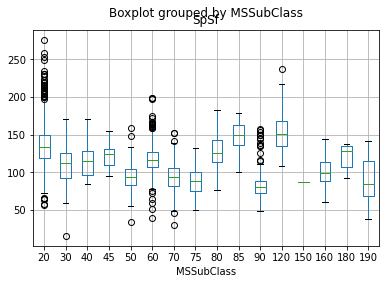

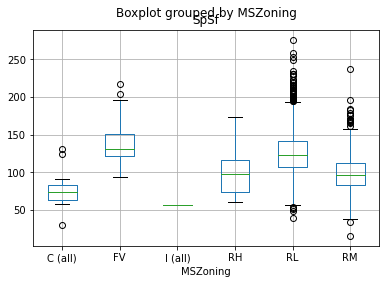

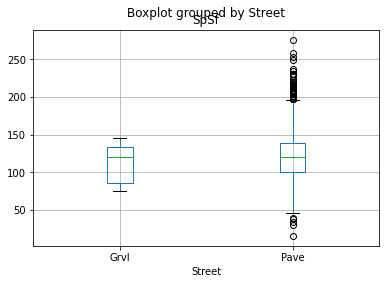

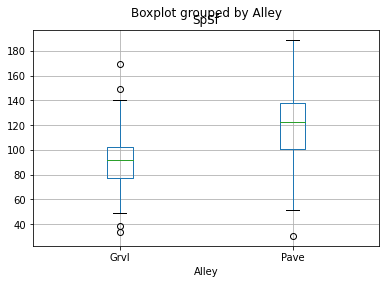

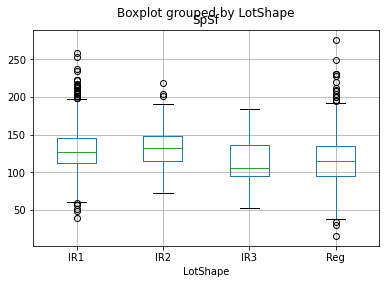

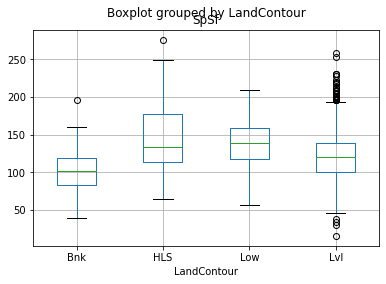

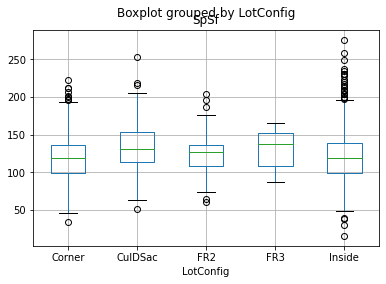

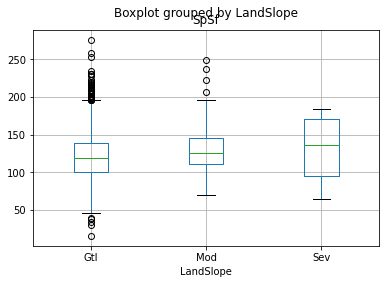

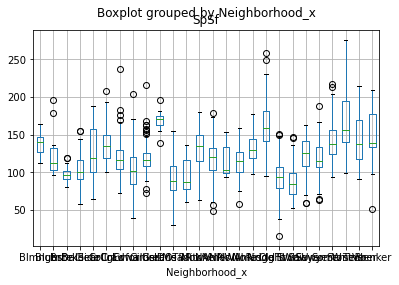

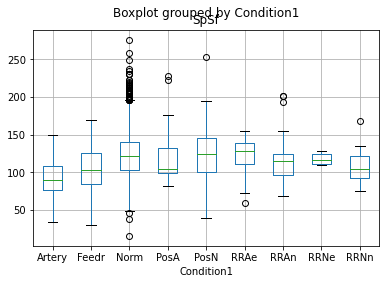

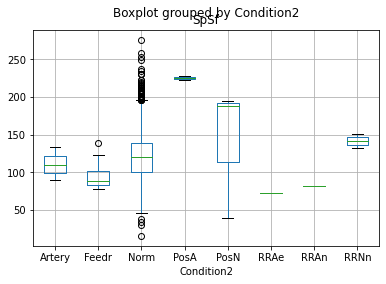

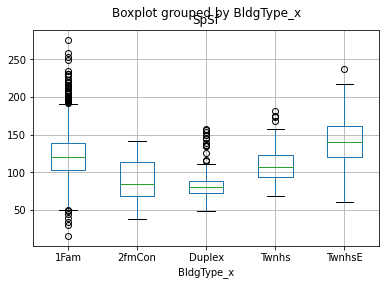

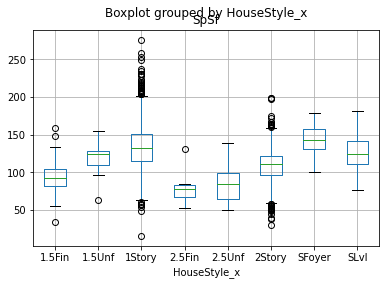

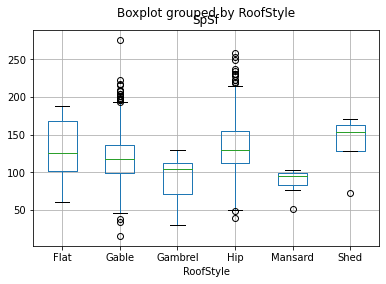

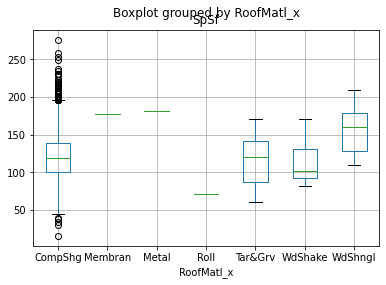

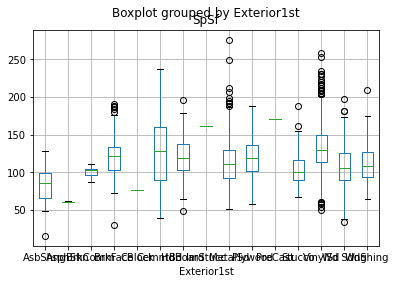

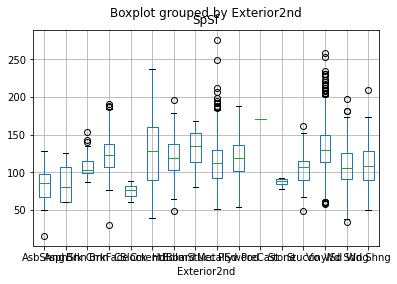

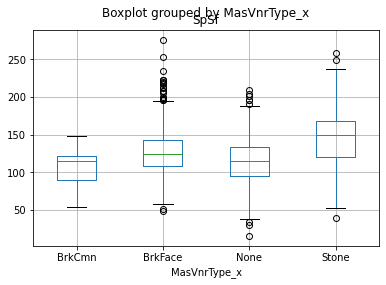

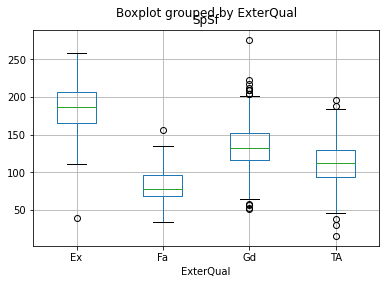

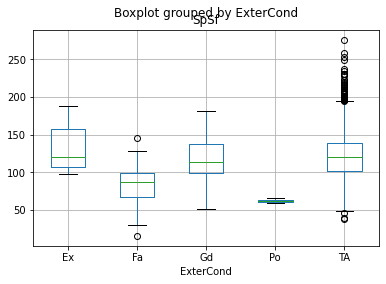

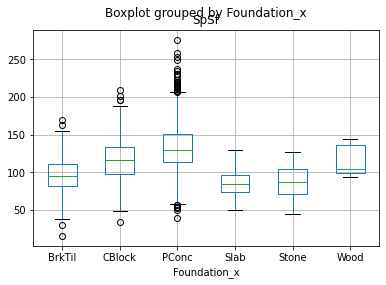

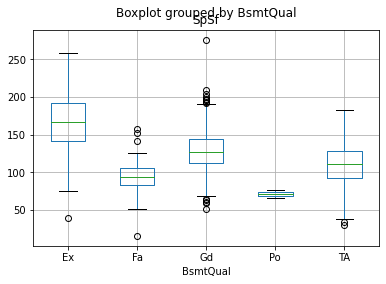

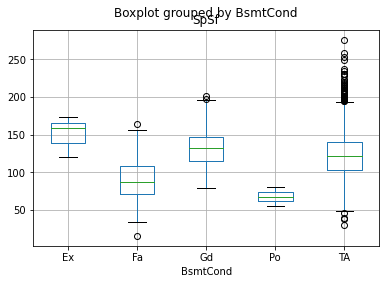

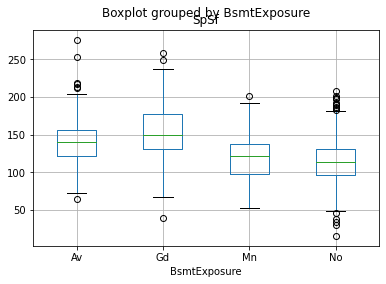

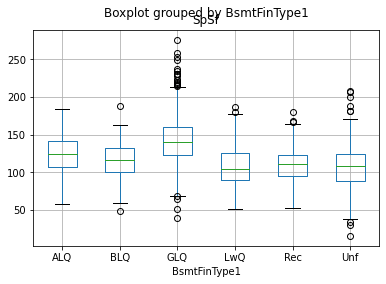

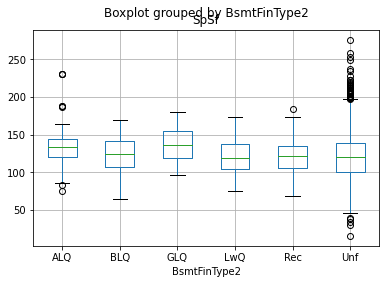

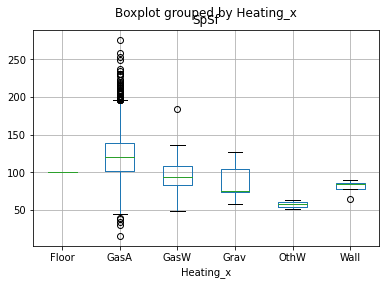

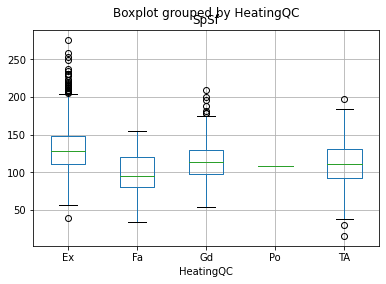

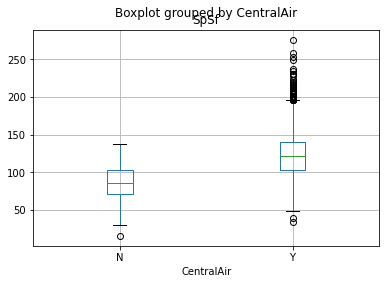

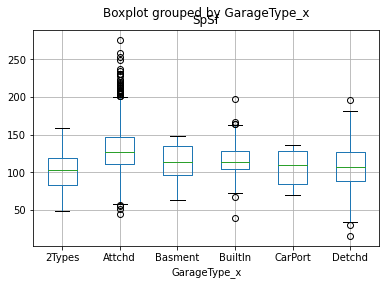

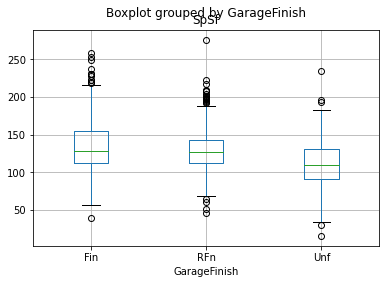

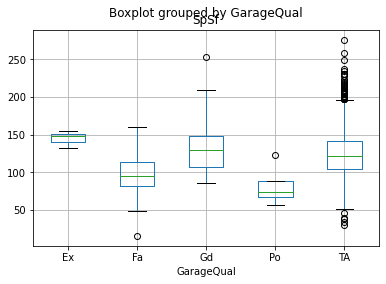

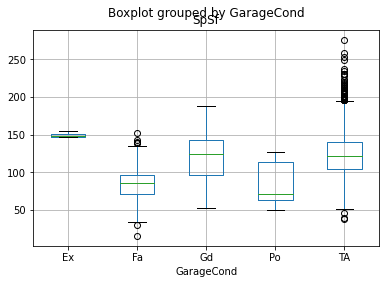

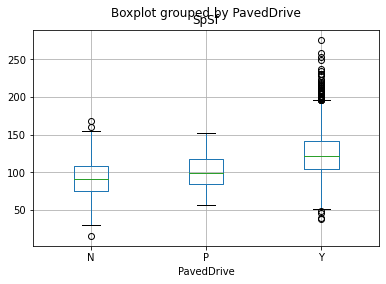

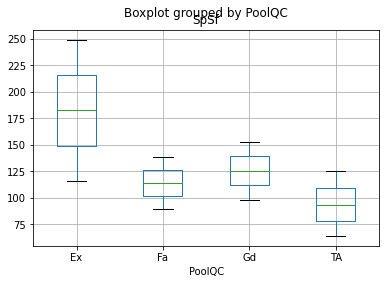

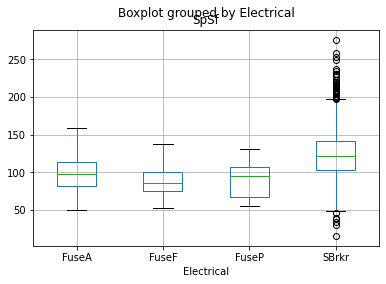

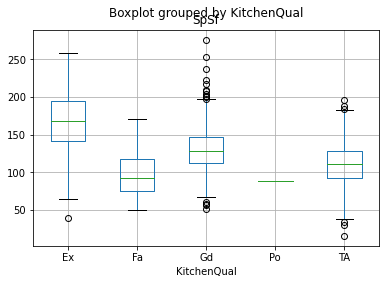

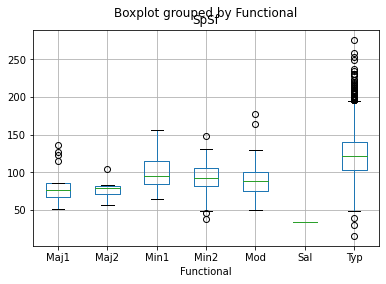

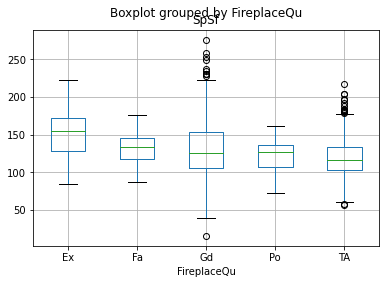

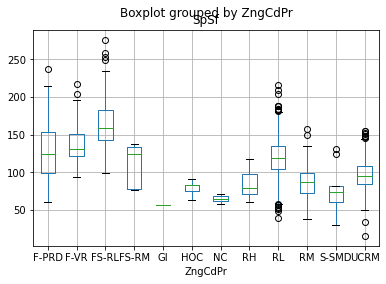

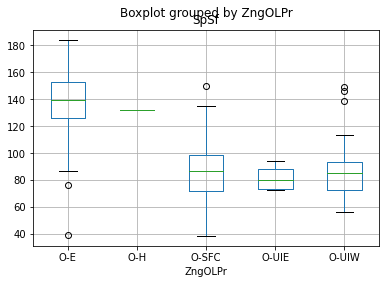

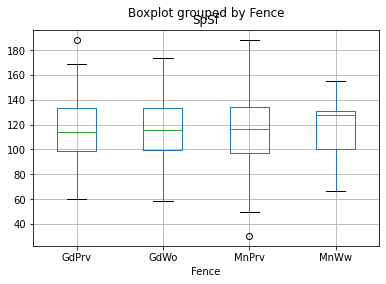

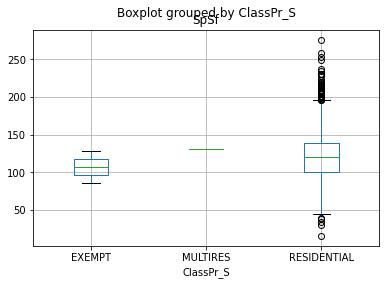

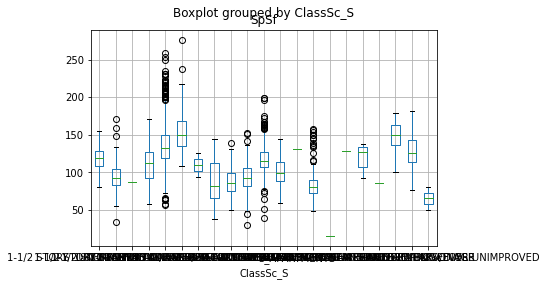

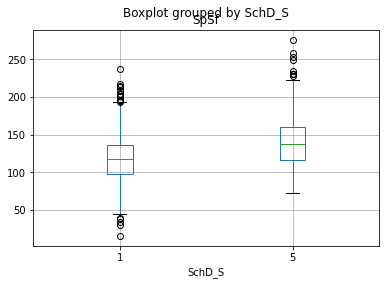

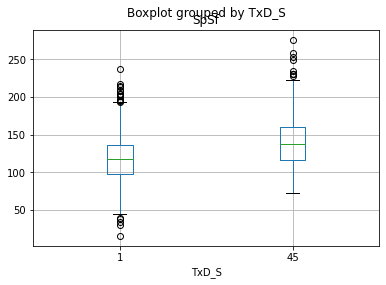

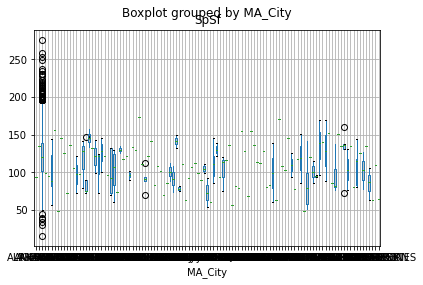

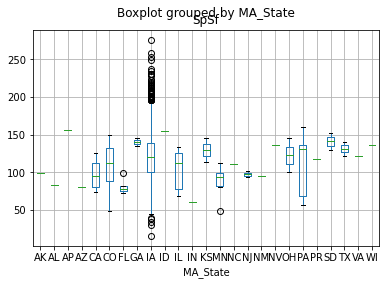

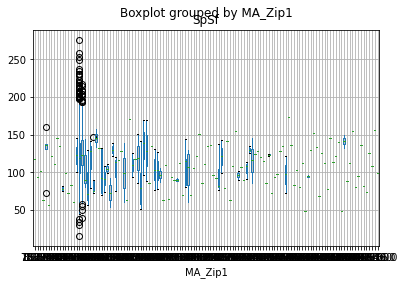

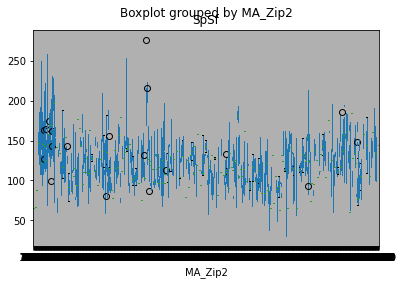

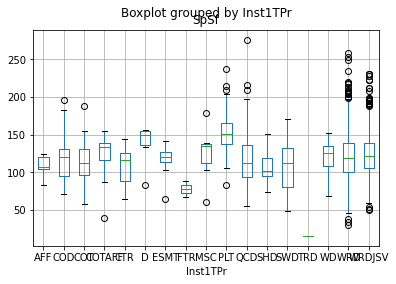

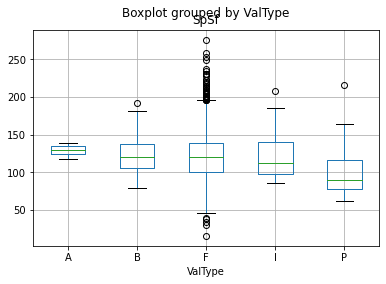

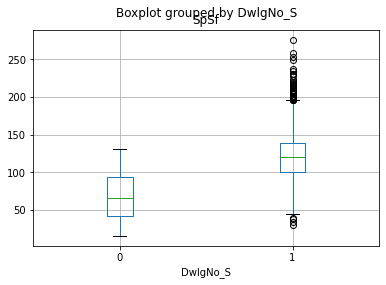

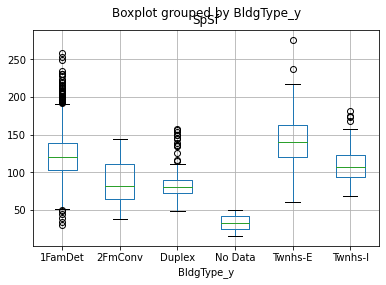

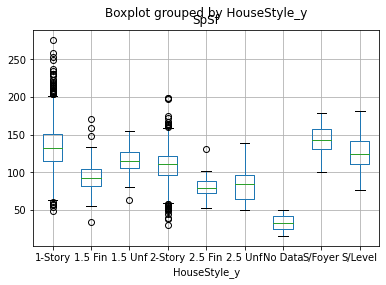

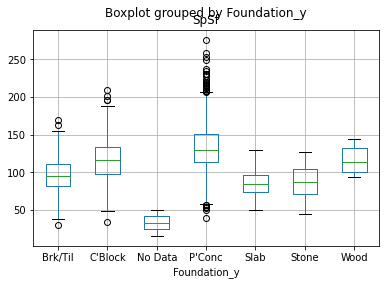

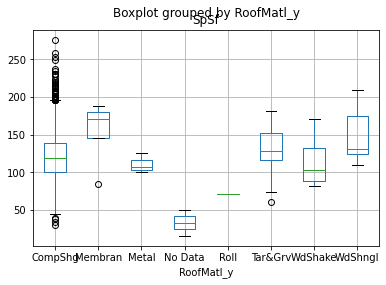

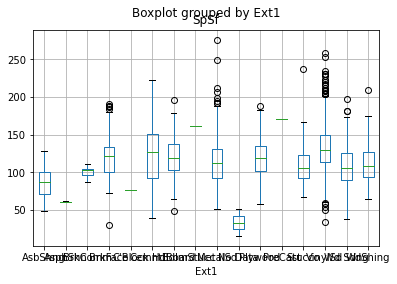

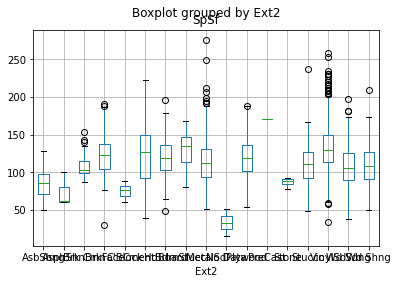

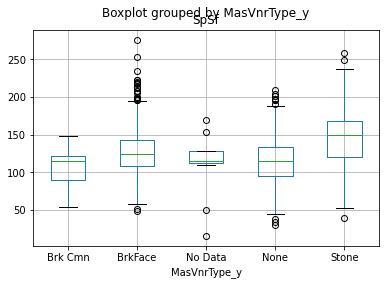

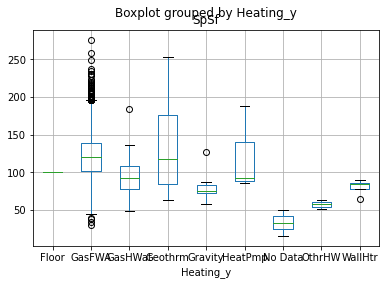

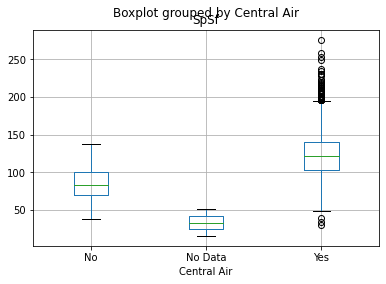

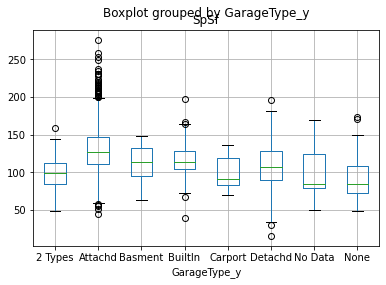

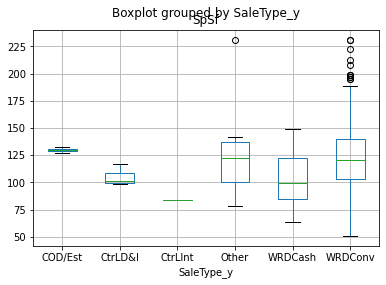

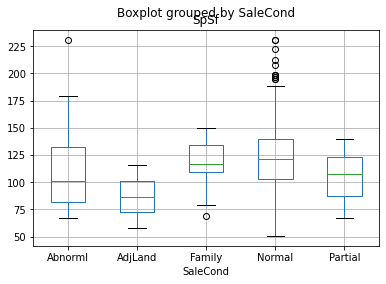

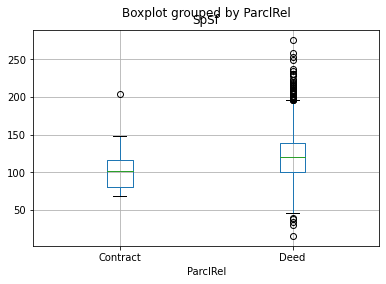

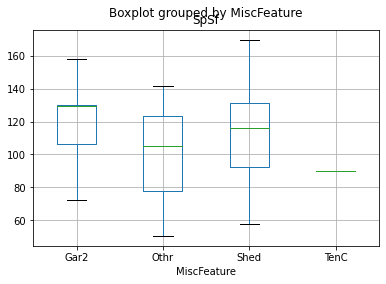

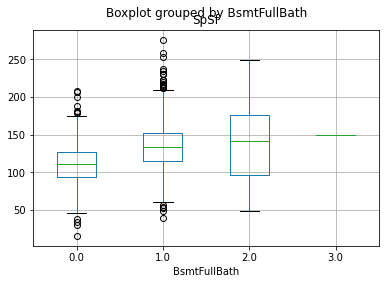

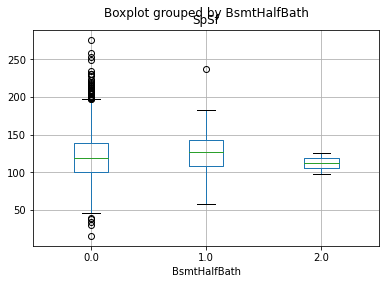

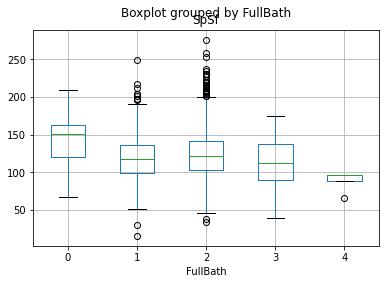

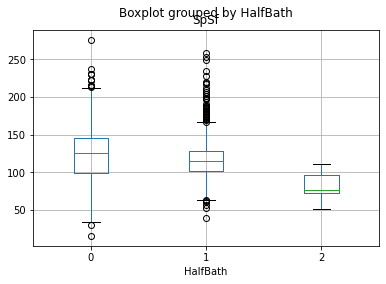

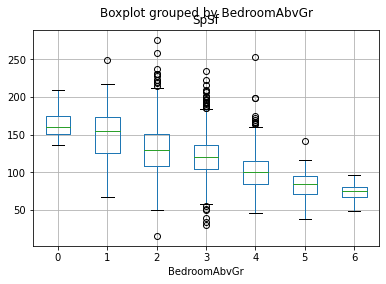

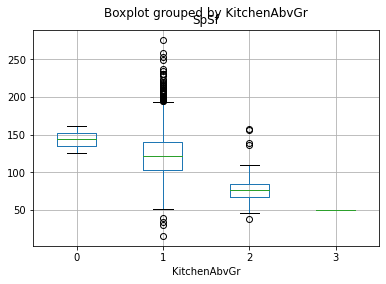

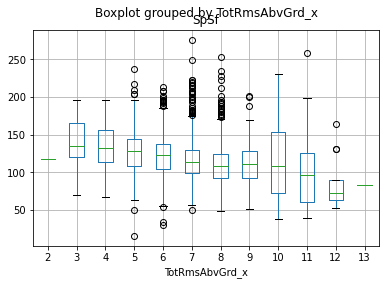

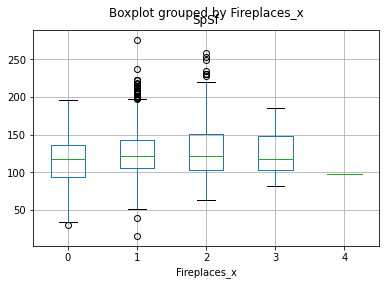

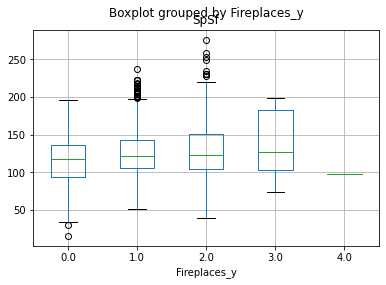

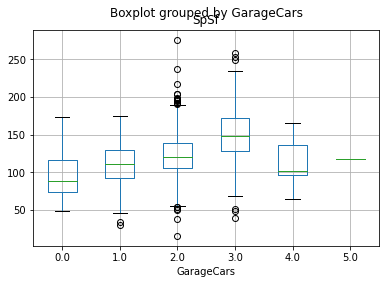

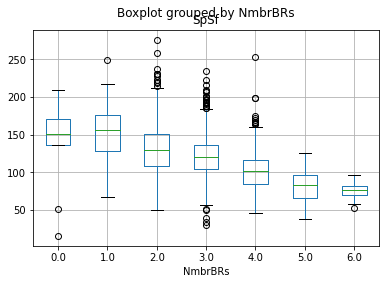

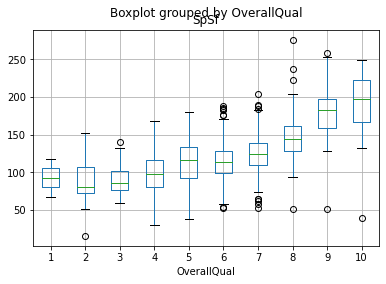

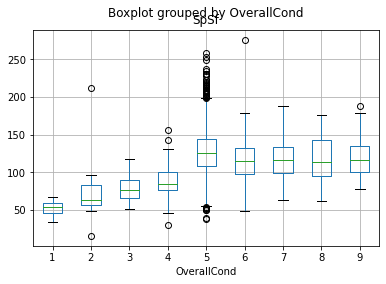

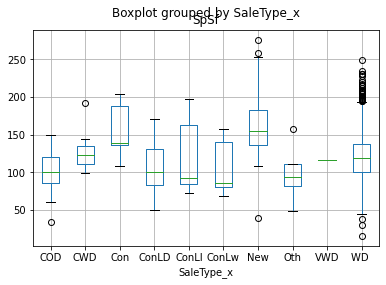

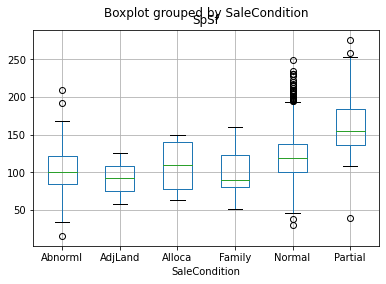

In [44]:
for col in clean_categ + clean_nonlin + clean_ordinal:
    both.boxplot(column='SpSf', by=col)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


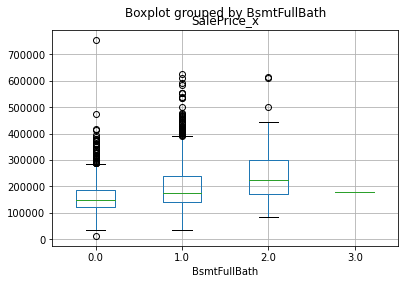

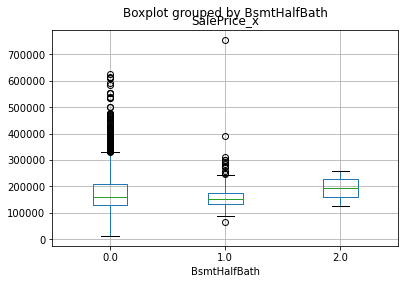

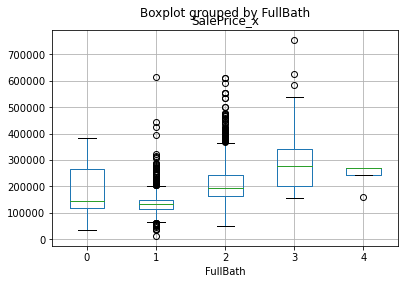

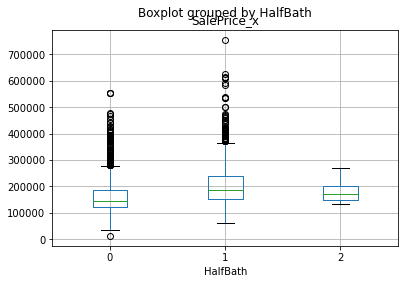

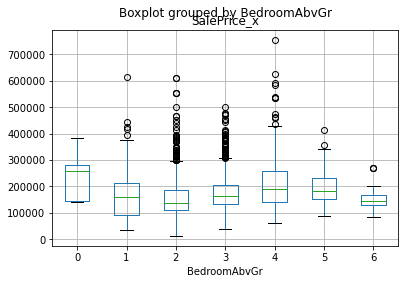

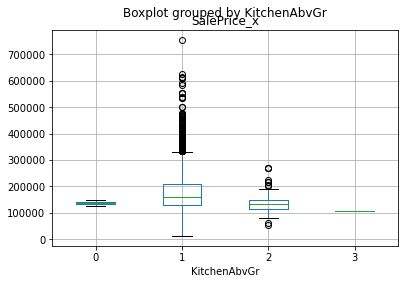

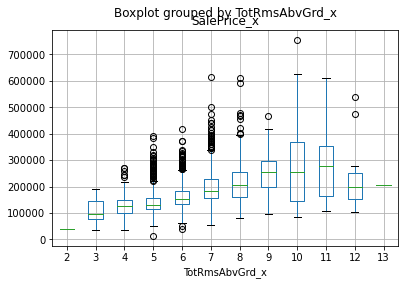

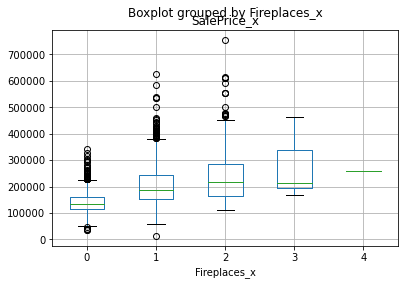

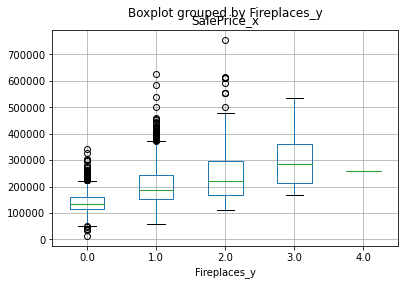

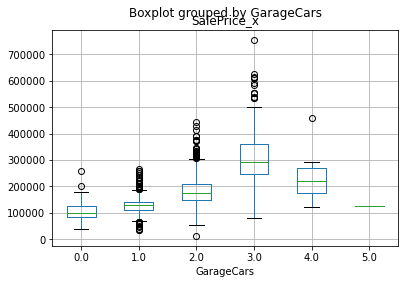

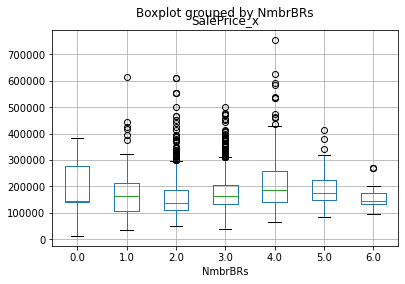

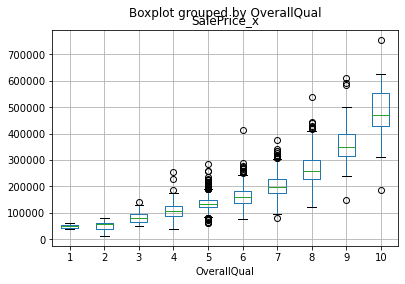

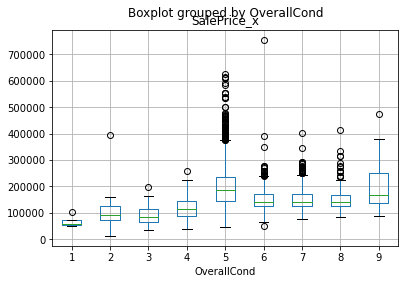

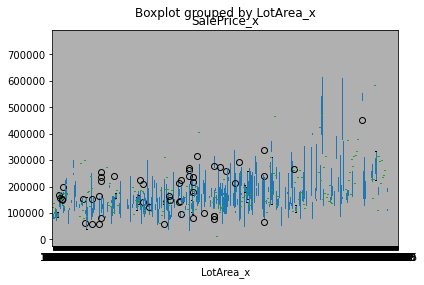

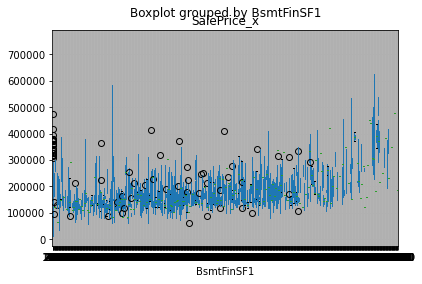

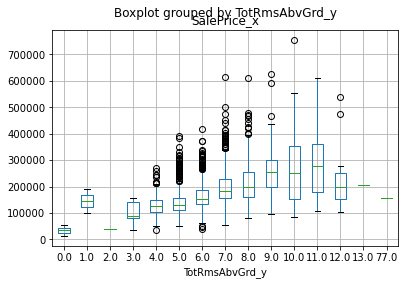

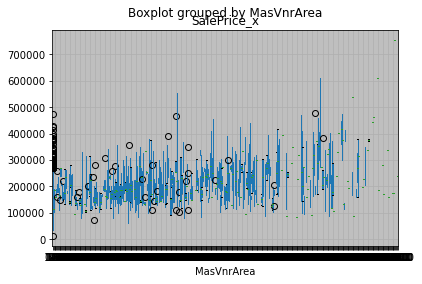

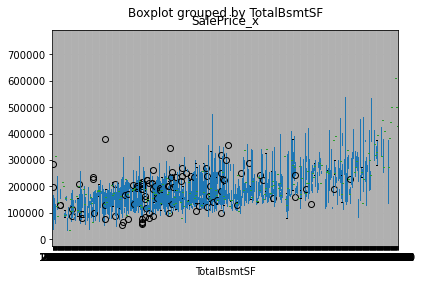

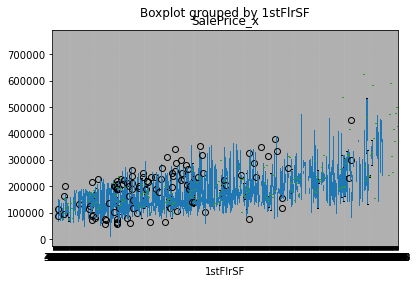

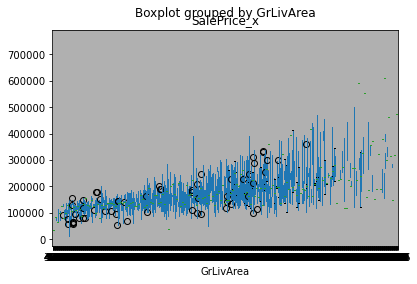

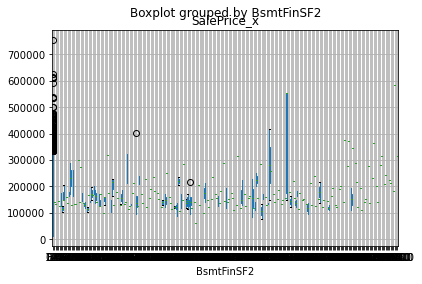

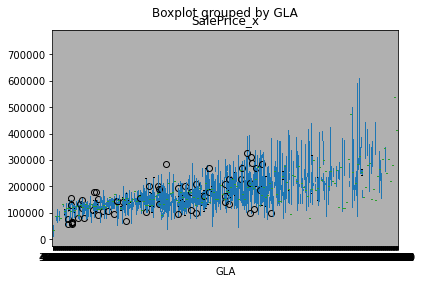

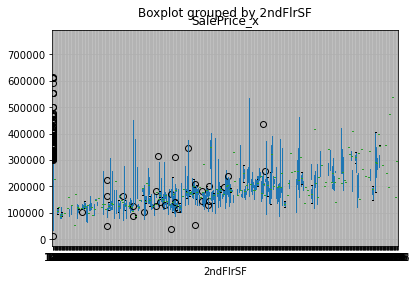

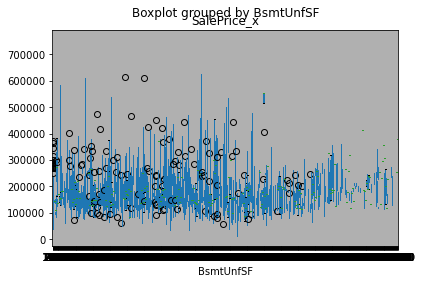

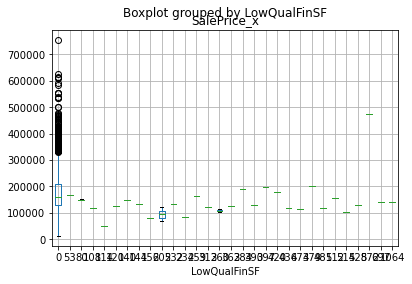

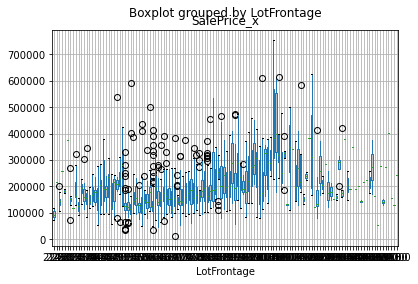

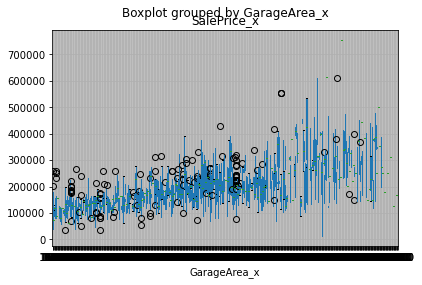

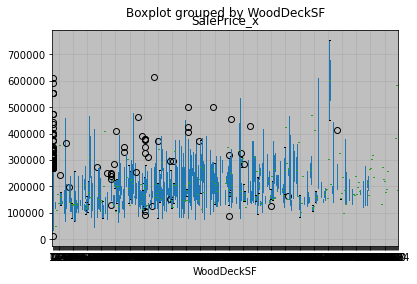

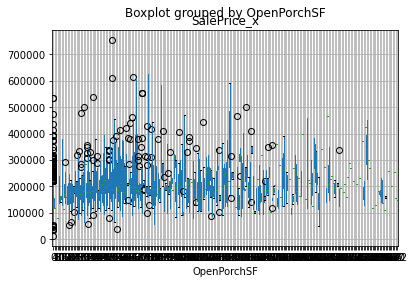

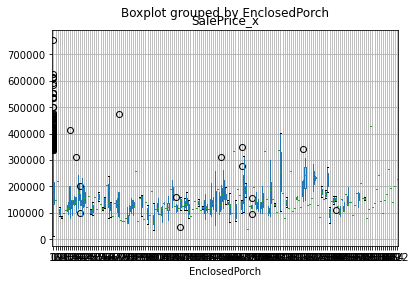

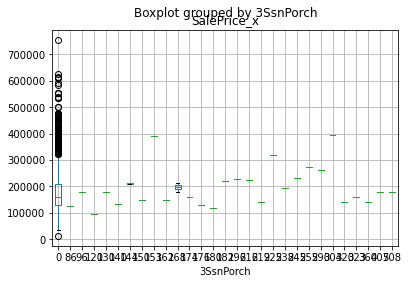

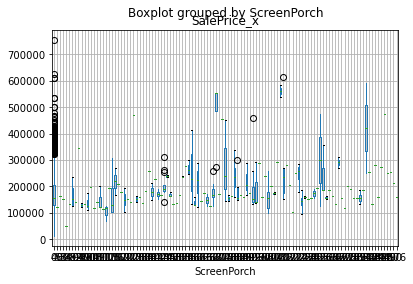

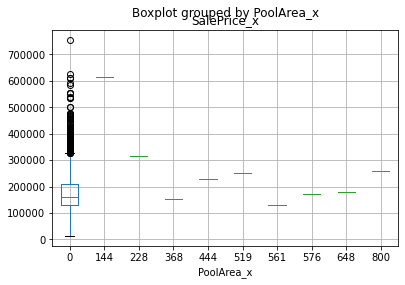

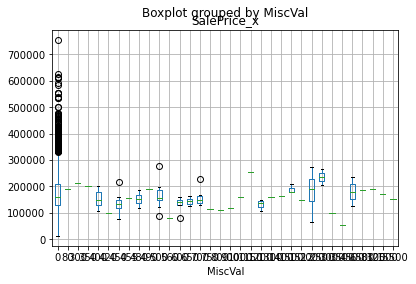

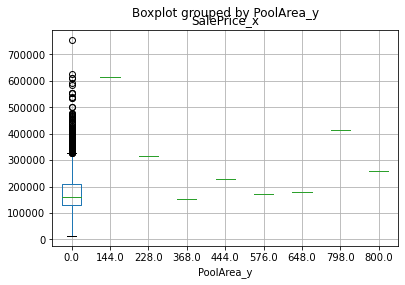

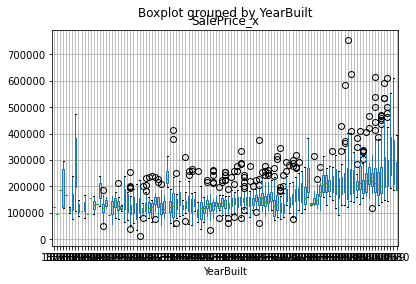

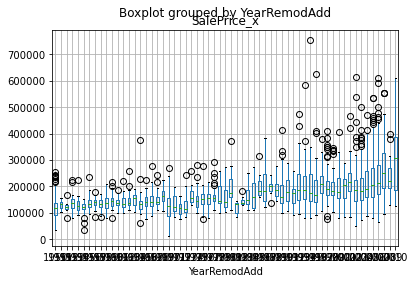

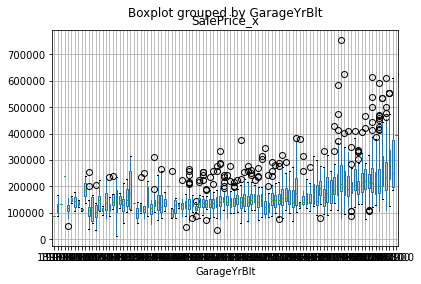

In [48]:
for col in clean_categ + clean_nonlin + clean_ordinal:
    both.boxplot(column='SalePrice_x', by=col)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


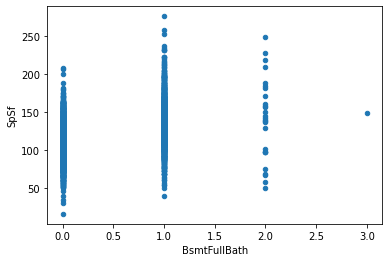

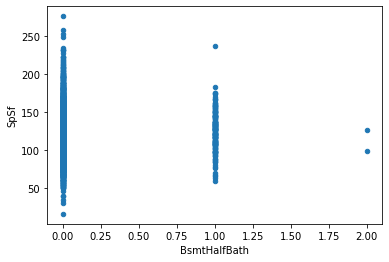

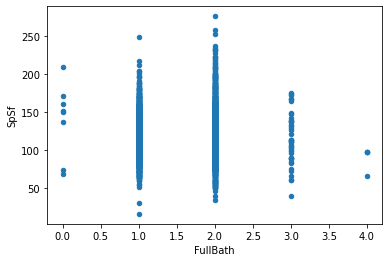

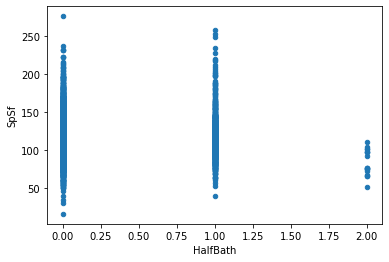

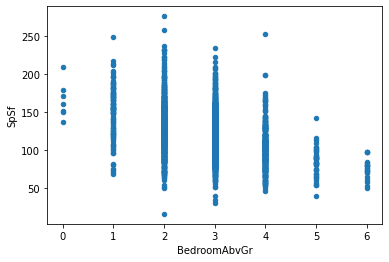

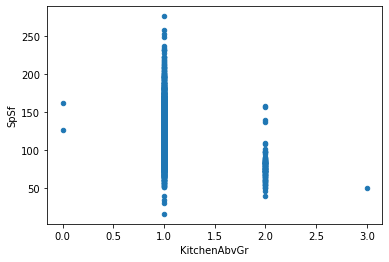

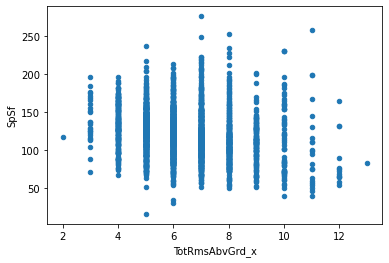

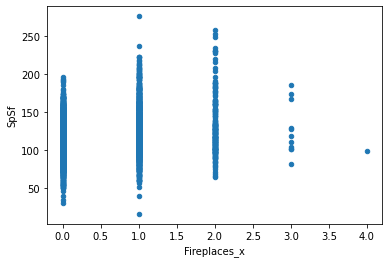

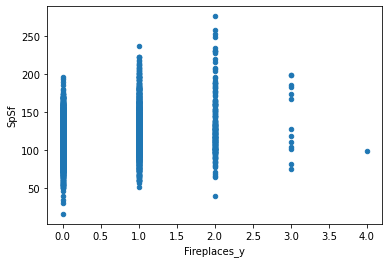

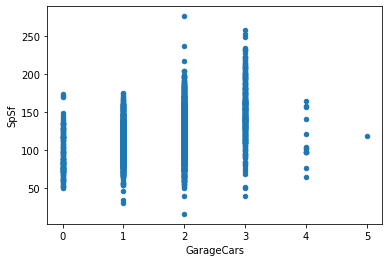

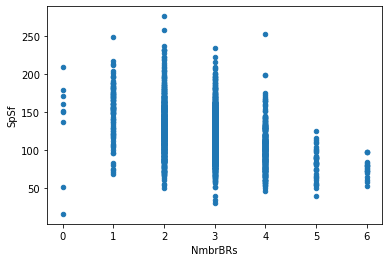

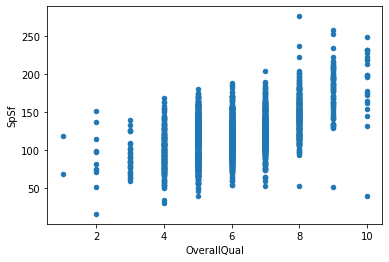

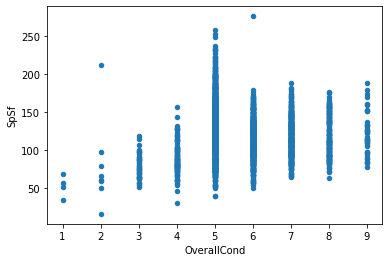

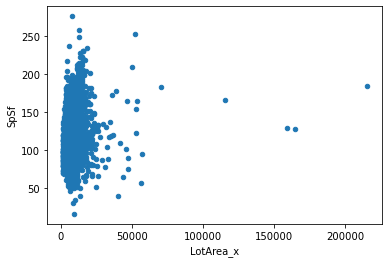

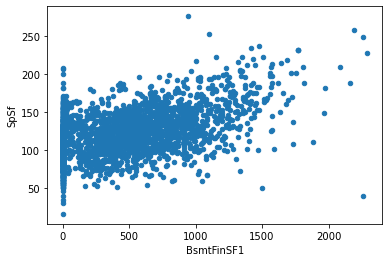

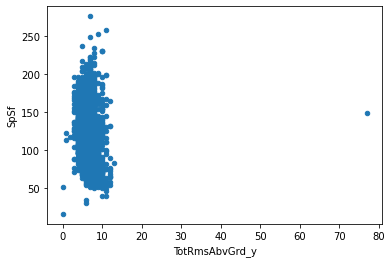

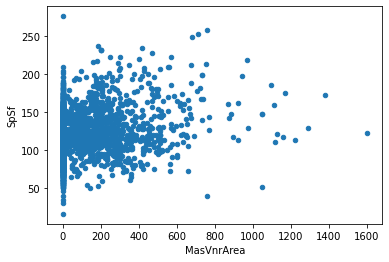

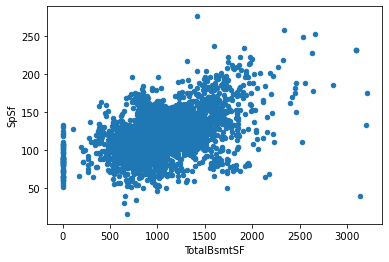

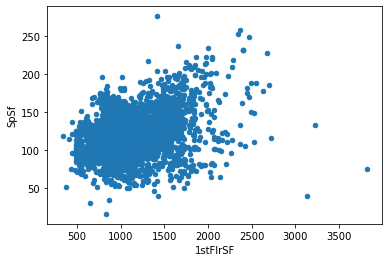

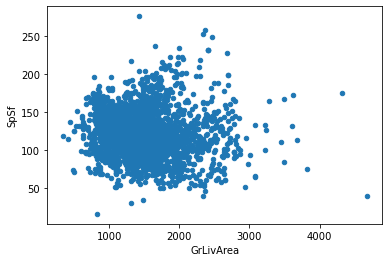

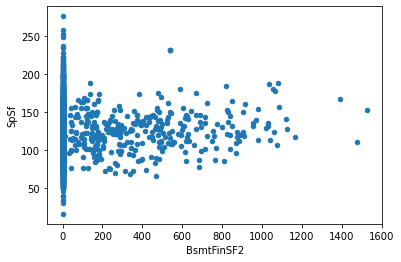

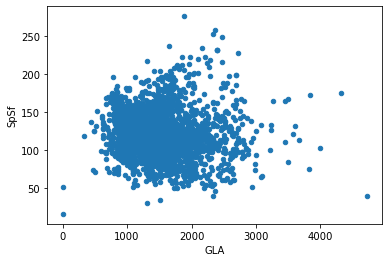

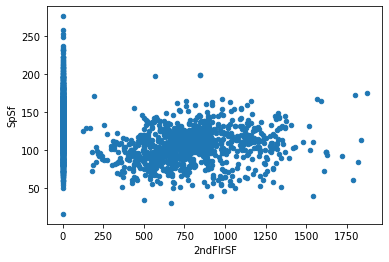

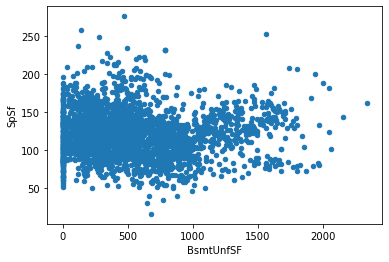

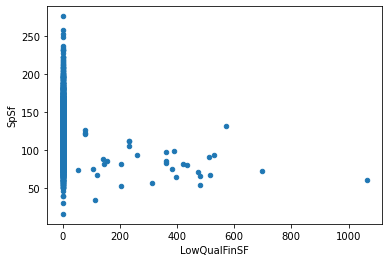

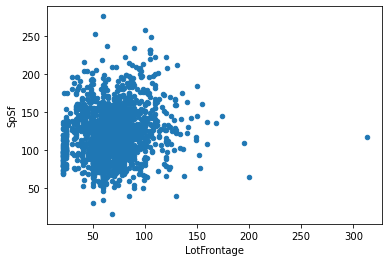

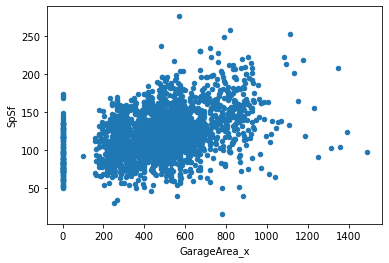

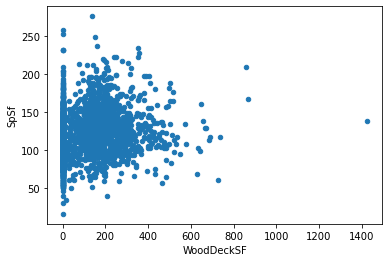

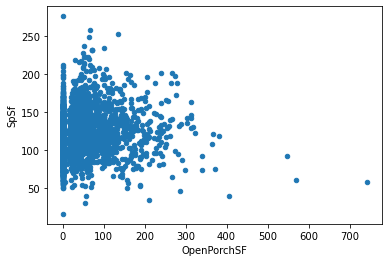

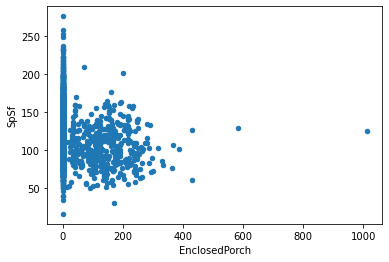

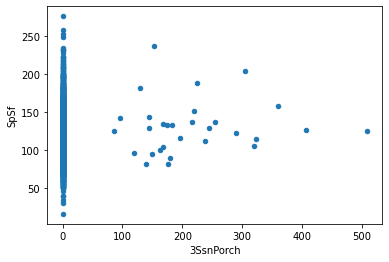

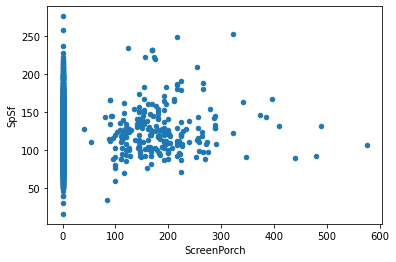

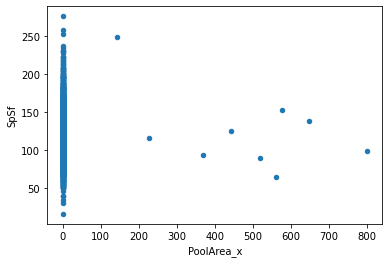

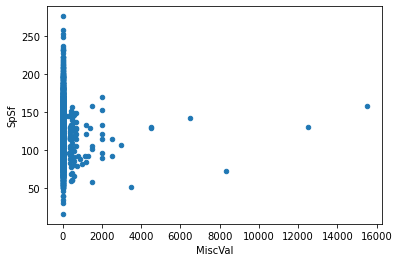

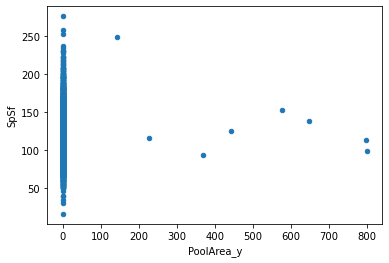

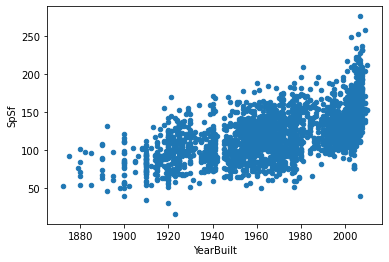

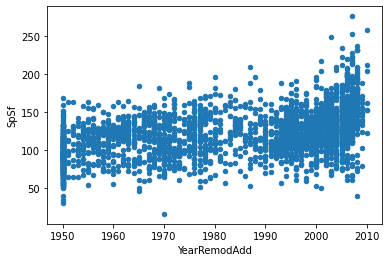

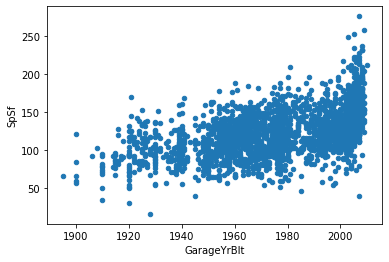

In [49]:
for col_nm in numers:
    both.plot.scatter(x=col_nm,y='SpSf')

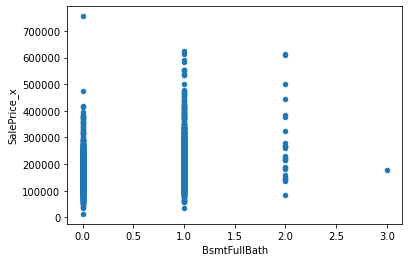

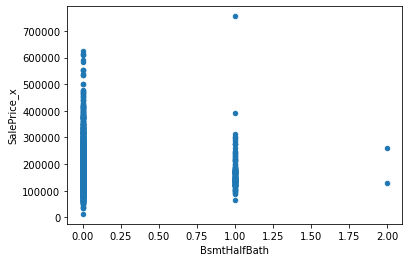

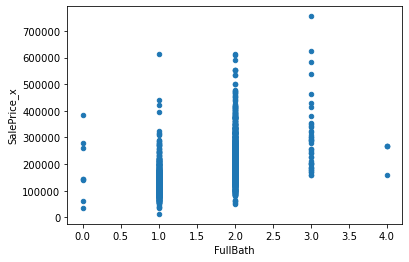

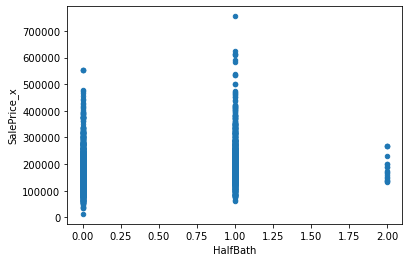

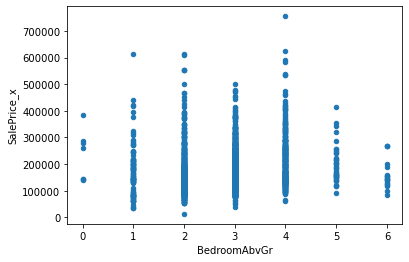

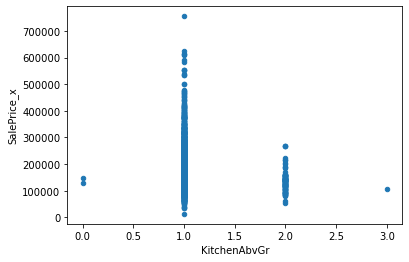

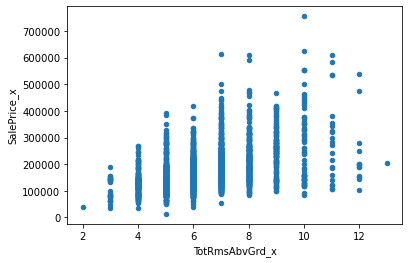

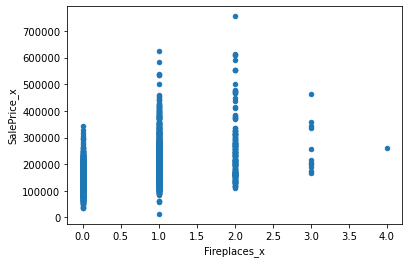

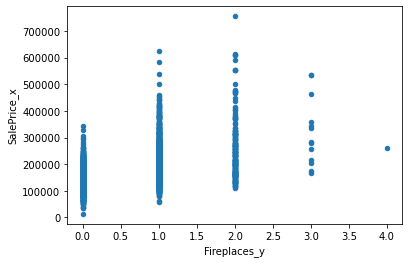

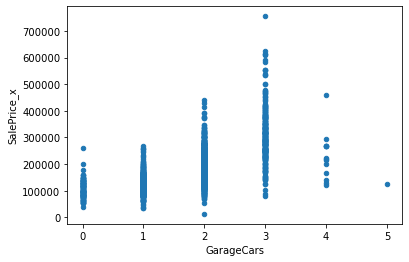

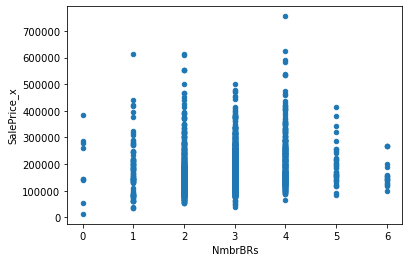

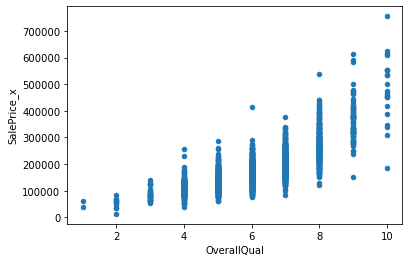

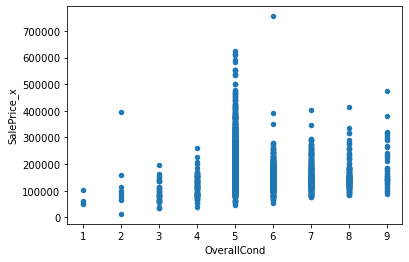

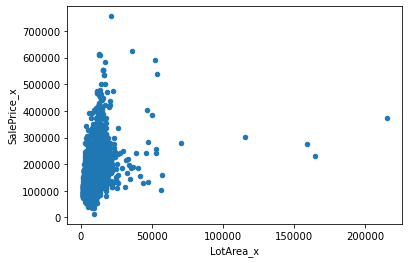

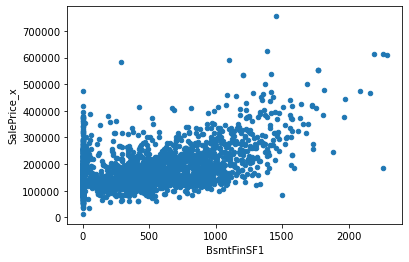

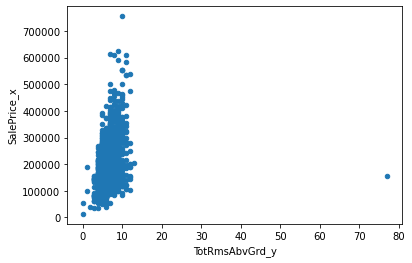

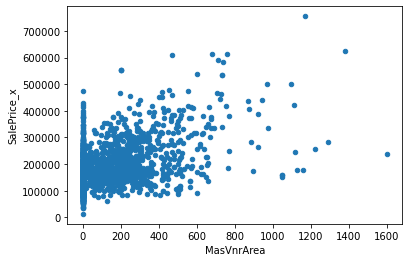

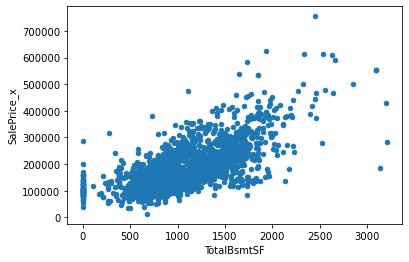

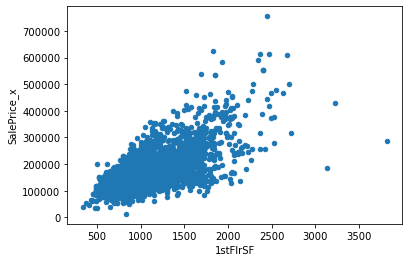

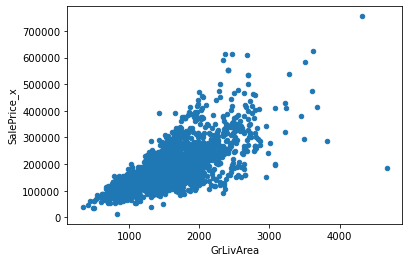

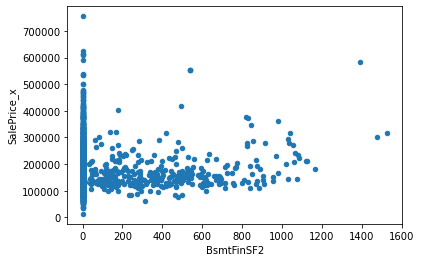

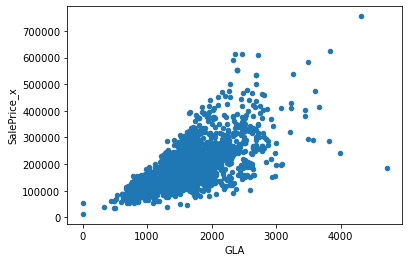

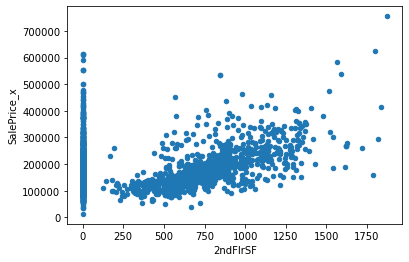

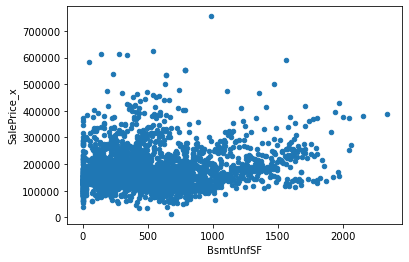

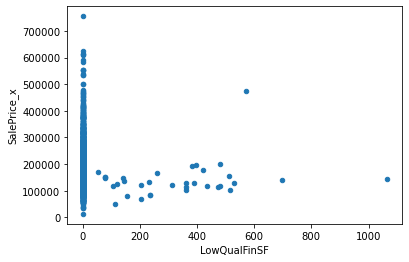

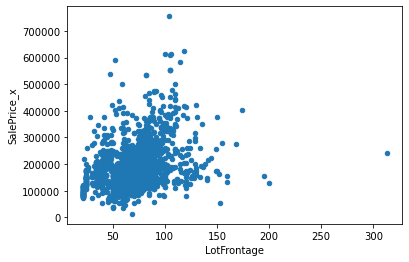

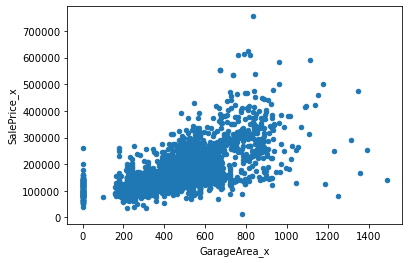

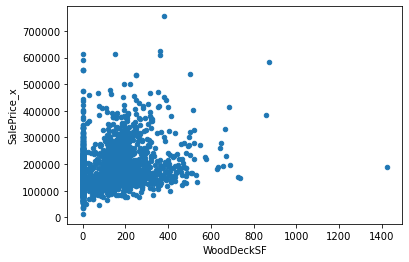

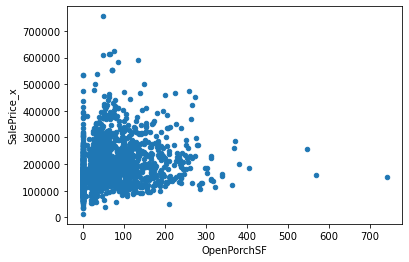

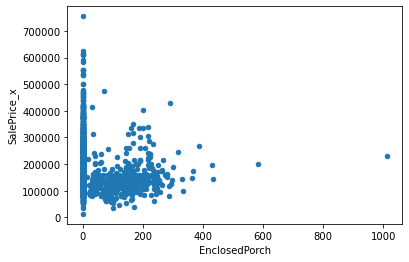

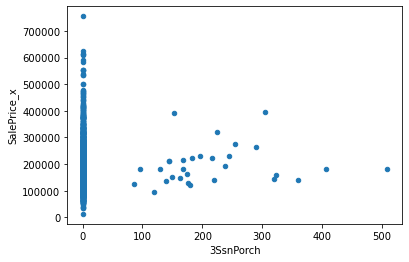

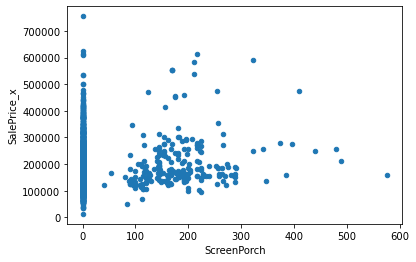

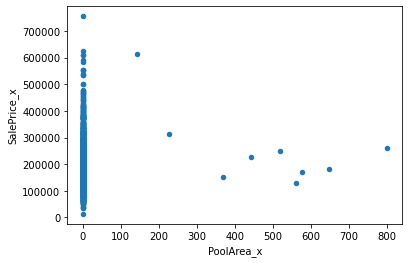

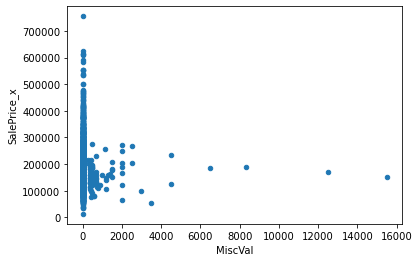

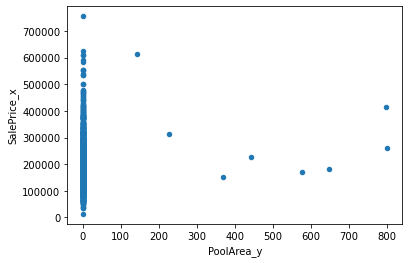

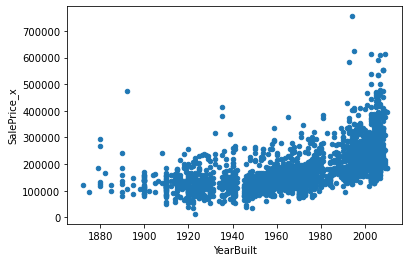

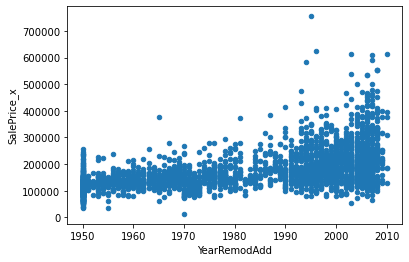

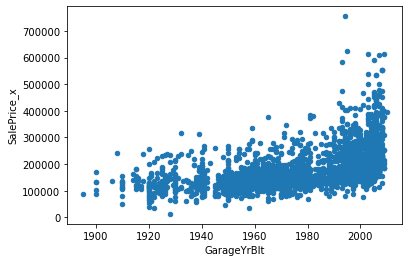

In [50]:
for col_nm in numers:
    both.plot.scatter(x=col_nm,y='SalePrice_x')

In [11]:
choices = ['chi2', 'f_test', 'mutual_info']

In [85]:
numerical = both[numers].copy()
numerical.fillna(0,inplace=True)
numerical.isnull().any().sum()

0

In [96]:
num_cols = list(numerical.columns)
drop_these=['Fireplaces_y','PoolArea_x','MiscVal','PoolArea_y']
num_to_dum = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd_x','Fireplaces_x','GarageCars','NmbrBRs','OverallQual','OverallCond']
as_is = list(set(num_cols) - set(drop_these) - set(num_to_dum))


In [14]:
# df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0) # format for replacemnt of nulls 

In [93]:
numerical.isnull().any().sum()

0

In [122]:
both[num_to_dum] ## mutual_info_classif
both[as_is] ## f_classif

len(both[as_is].columns)  #22
len(both[num_to_dum].columns) #12

initial_X_lins = both[as_is].replace(np.nan,0)
second_X_test = both[num_to_dum].replace(np.nan,0)

y1 = both['SalePrice_x']
y2 = both['SpSf']

10


In [153]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
linselector1 = SelectKBest(f_classif, k='all').fit(initial_X_lins,y1)
linear_ttl = sorted(list(zip(linselector1.pvalues_,initial_X_lins.columns)))
linear_ttl_scr = sorted(list(zip(linselector1.scores_,initial_X_lins.columns)),reverse=True)
linselector2 = SelectKBest(f_classif, k='all').fit(initial_X_lins,y2)
linear_psf = sorted(list(zip(linselector2.pvalues_,initial_X_lins.columns)))
linear_psf_scr = sorted(list(zip(linselector2.scores_,initial_X_lins.columns)),reverse=True)

In [154]:
linselector3 = SelectKBest(f_classif, k='all').fit(second_X_test,y1)
nonlinear_ttl = sorted(list(zip(linselector3.pvalues_,second_X_test.columns)))
nonlinear_ttl_scr = sorted(list(zip(linselector3.scores_,second_X_test.columns)),reverse=True)
linselector4 = SelectKBest(f_classif, k='all').fit(second_X_test,y2)
nonlinear_psf = sorted(list(zip(linselector4.pvalues_,second_X_test.columns)))
nonlinear_psf_scr = sorted(list(zip(linselector4.scores_,second_X_test.columns)),reverse=True)

In [155]:
## P-values
linear_ttl
linear_psf
nonlinear_ttl
nonlinear_psf

[(8.642306228784726e-20, 'KitchenAbvGr'),
 (7.51894753197561e-16, 'TotRmsAbvGrd_x'),
 (1.3722959341995123e-14, 'BedroomAbvGr'),
 (7.183773201616419e-10, 'HalfBath'),
 (1.027485800592788e-09, 'OverallQual'),
 (7.749874245968641e-09, 'GarageCars'),
 (4.600906727401681e-08, 'BsmtFullBath'),
 (1.5013940193002385e-07, 'OverallCond'),
 (3.184298496850252e-07, 'Fireplaces_x'),
 (5.420691943530356e-07, 'NmbrBRs'),
 (8.031639499142609e-06, 'FullBath'),
 (0.0467115939721086, 'BsmtHalfBath')]

In [156]:
linear_ttl_scr
linear_psf_scr
nonlinear_ttl_scr
nonlinear_psf_scr

[(4.671927814507942, 'KitchenAbvGr'),
 (3.7665934882703733, 'TotRmsAbvGrd_x'),
 (3.5034892169832568, 'BedroomAbvGr'),
 (2.6127565463735403, 'HalfBath'),
 (2.585538812981732, 'OverallQual'),
 (2.433885383260618, 'GarageCars'),
 (2.3027532359223626, 'BsmtFullBath'),
 (2.216796579211019, 'OverallCond'),
 (2.1625455303074594, 'Fireplaces_x'),
 (2.1243151591702176, 'NmbrBRs'),
 (1.9319395771022405, 'FullBath'),
 (1.2774845975819122, 'BsmtHalfBath')]

In [22]:
to_dum = clean_ordinal
X2 = pd.get_dummies(both[to_dum],drop_first=True)

In [161]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X2,y)

# selector = SelectKBest(chi2, k=50).fit(X2,y)
# x_new = selector.transform(X2) # not needed to get the score
# selector.scores_
# lst_sig = sorted(list(zip(selector.pvalues_, X2.columns)))
# sig = [x[0]<.05 for x in lst_sig]
# sig_lst=[]
# def is_sig(lst):
#     for elem in lst:
#         if elem[0]<.05:
#             sig_lst.append(elem)
# is_sig(lst_sig)

# sig_lst

clean_df =  both[categ+ nonlin + lin + date_tm + numers] ## 65 nulls
# clean_df = clean_df.fillna(0)
y1 = both['SalePrice_x']
y2 = both['SpSf']
pd.concat()

65

In [175]:
# clean_df_test =  
df1 = both[nonlin + lin + date_tm + numers]
df2 = pd.get_dummies(both[categ],drop_first=True)
df3 = pd.concat([df1,df2],axis=1)
df3
# clean_df_test.fillna(0)

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd_x,Fireplaces_x,Fireplaces_y,GarageCars,...,SaleType_x_ConLw,SaleType_x_New,SaleType_x_Oth,SaleType_x_VWD,SaleType_x_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.0,1,0,2,1,4,1,1.0,2.0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,0.0,2,0,2,1,5,0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,0.0,2,0,2,1,5,0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
3,0.0,0.0,1,0,2,1,5,0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,0.0,0.0,1,0,2,1,6,0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,0.0,0.0,1,0,2,1,4,1,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0
2599,0.0,0.0,2,0,4,1,8,1,1.0,2.0,...,0,0,0,0,1,0,0,0,1,0
2600,0.0,0.0,2,0,4,2,8,0,0.0,3.0,...,0,0,0,0,1,0,0,0,1,0
2601,1.0,0.0,2,1,3,1,7,1,1.0,2.0,...,0,0,0,0,1,0,0,0,1,0


In [178]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df3.fillna(0),y2.fillna(0))
model.score(df3.fillna(0),y2.fillna(0))

0.8954368155596637

In [12]:
# both[clean_X].replace(np.nan,0,inplace=True)
both[clean_X] = both[clean_X].replace(np.nan,0)